<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/svd_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)

In [21]:
!git clone https://github.com/xhxuciedu/CS206.git

fatal: destination path 'CS206' already exists and is not an empty directory.


In [22]:
img = cv2.imread('CS206/lenna.jpg')

In [23]:
img.shape

(512, 512, 3)

In [36]:
img = img[:,:,0]

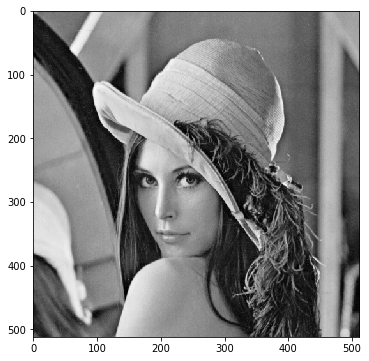

In [37]:
plt.imshow(img, cmap='gray')

## Compress images using SVD
* The original image is represented by matrix $A$.

* First, find SVD of $A$, 
$$A=U\Sigma V^T$$

* Second, reconstruct the image using the top $k$ rank-1 matrices ranked by singular values
$$\bar A = \sum_{i=1}^k \sigma_i u_i v_i^T$$





In [38]:
# find SVD of img
U, sigma, V = np.linalg.svd(img)

In [39]:
U.shape, sigma.shape, V.shape

((512, 512), (512,), (512, 512))

In [42]:
# calculate the norm of the matrix

# induced 2-norm
print('Induced 2-norm:', np.linalg.norm(img, 2))
print(sigma[0])

print('Frobenius norm')
print(np.linalg.norm(img,'fro'))
print(np.sqrt(np.sum(sigma**2)))

('Induced 2-norm:', 62278.340752429045)
62278.34075242901
Frobenius norm
67222.01888518374
67222.01888518372


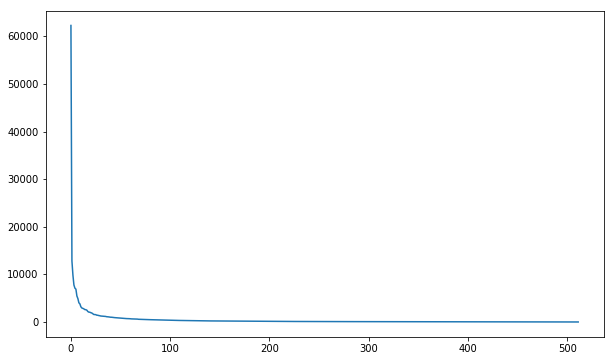

In [43]:
plt.plot(sigma)

(array([481.,  15.,   6.,   3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.15507419e-01, 1.24568001e+03, 2.49124452e+03, 3.73680902e+03,
        4.98237353e+03, 6.22793803e+03, 7.47350254e+03, 8.71906704e+03,
        9.96463155e+03, 1.12101961e+04, 1.24557606e+04, 1.37013251e+04,
        1.49468896e+04, 1.61924541e+04, 1.74380186e+04, 1.86835831e+04,
        1.99291476e+04, 2.11747121e+04, 2.24202766e+04, 2.36658411e+04,
        2.49114056e+04, 2.61569701e+04, 2.74025346e+04, 2.86480991e+04,
        2.98936636e+04, 3.11392281e+04, 3.23847926e+04, 3.36303571e+04,
        3.48759216e+04, 3.61214861e+04, 3.73670507e+04, 3.86126152e+04,
        3.98581797e+04, 4.11037442e+04, 4.23493087e+04, 4.35948732e+04,
        4.

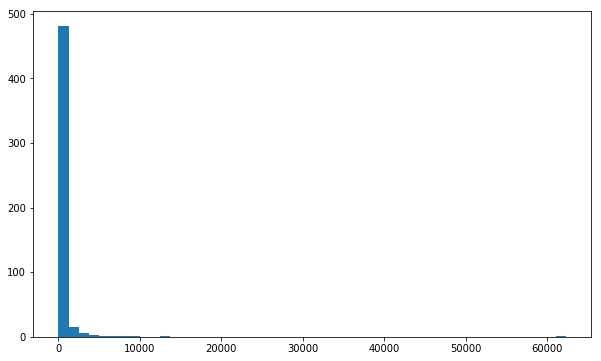

In [44]:
plt.hist(sigma,50)

In [45]:
k = 10
img2 = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])

(-0.5, 511.5, 511.5, -0.5)

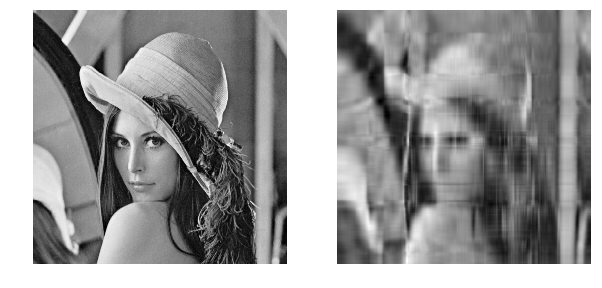

In [46]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img2,cmap='gray')
ax[1].axis('off')

##SVD Compress Color Images

In [80]:
face = cv2.imread('CS206/tiger-face-close-up.jpg')
face = face[:,:,[2,1,0,]]  # change channel to RGB

In [81]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

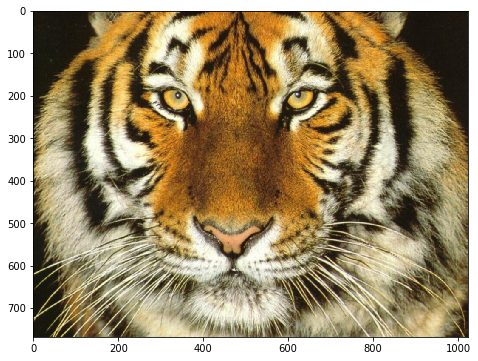

In [82]:
plt.imshow(face)

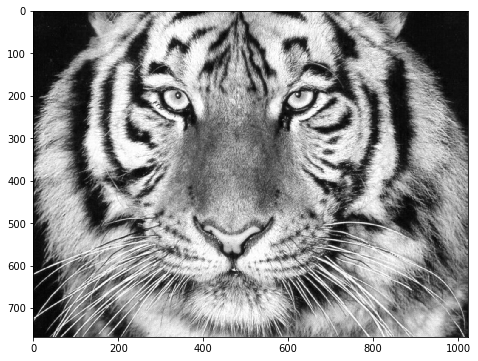

In [83]:
plt.imshow(face[:,:,0],cmap='gray')

In [84]:
U, sigma, V = np.linalg.svd(face[:,:,0])

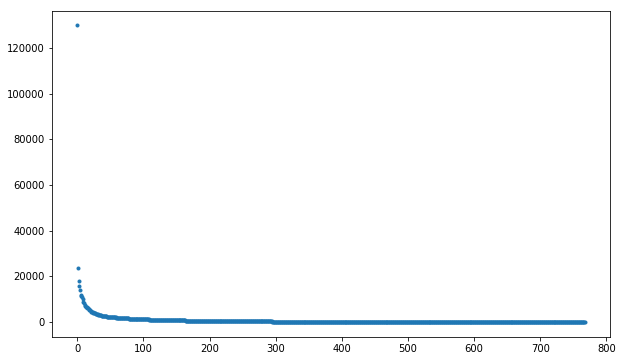

In [85]:
plt.plot(sigma,'.')

(array([675.,  53.,  15.,   6.,   5.,   3.,   2.,   1.,   2.,   1.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.28415149e+00, 1.30205608e+03, 2.60082801e+03, 3.89959993e+03,
        5.19837186e+03, 6.49714379e+03, 7.79591571e+03, 9.09468764e+03,
        1.03934596e+04, 1.16922315e+04, 1.29910034e+04, 1.42897754e+04,
        1.55885473e+04, 1.68873192e+04, 1.81860911e+04, 1.94848631e+04,
        2.07836350e+04, 2.2082

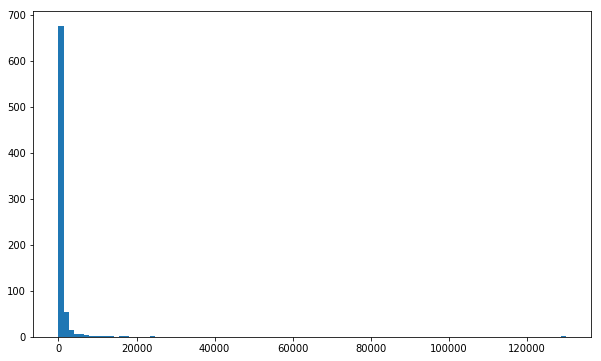

In [86]:
plt.hist(sigma,100)

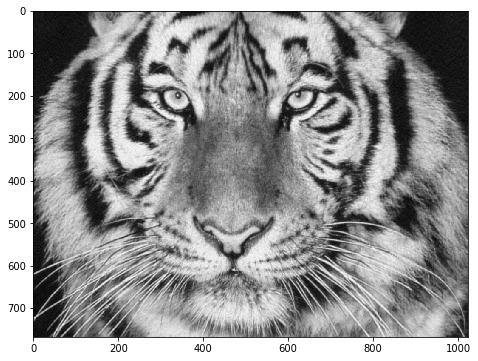

In [89]:
num_components = 150
reconstimg = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

plt.imshow(reconstimg, cmap='gray');

In [90]:
num_components = 50

reimg = np.zeros(face.shape)
for i in range(3):
    U, sigma, V = np.linalg.svd(face[:,:,i])
    reimg[:,:,i] = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

In [91]:
reimg[np.where(reimg>=255)]=255
reimg[np.where(reimg<0)]=0

(-0.5, 1023.5, 767.5, -0.5)

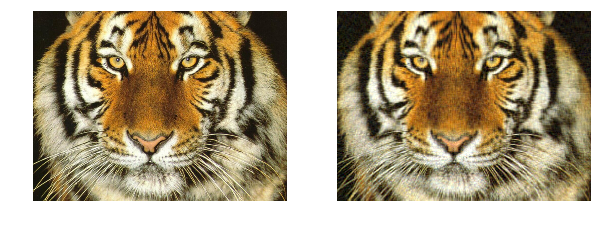

In [92]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(face)
ax[0].axis('off')
ax[1].imshow(reimg.astype(face.dtype))
ax[1].axis('off')